In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [14]:
fr_videos = pd.read_csv('FRvideos.csv')
with open('FR_category_id.json', 'r') as f:
    fr_videos_json = json.load(f)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fr_videos.head()

In [ ]:
fr_videos.info()

In [ ]:
fr_videos.describe()

In [ ]:
fr_videos.dtypes

In [ ]:
# Tablas de frecuencia
print(fr_videos['category_id'].value_counts())
print(fr_videos['channel_title'].value_counts().head(10))
print(fr_videos['state'].value_counts())

In [44]:
# Crear el diccionario de mapeo category_id -> title
category_mapping = {int(item['id']): item['snippet']['title'] for item in fr_videos_json['items']}

# Verificar el diccionario de mapeo
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [45]:

# Reemplazar los valores de category_id con los títulos correspondientes
fr_videos['category_id'] = fr_videos['category_id'].map(category_mapping)

# Columnas a eliminar
columnas_a_eliminar = [
    'thumbnail_link',
    'comments_disabled',
    'ratings_disabled',
    'video_error_or_removed',
    'description',
    'lat',
    'lon',
    'geometry'
]

# Eliminar las columnas innecesarias
fr_videos.drop(columns=columnas_a_eliminar, inplace=True)

# Ver las primeras filas del dataset para verificar
print(fr_videos.head())


      video_id trending_date  \
0  Ro6eob0LrCY      17.14.11   
1  Yo84eqYwP98      17.14.11   
2  ceqntSXE-10      17.14.11   
3  WuTFI5qftCE      17.14.11   
4  ee6OFs8TdEg      17.14.11   

                                               title        channel_title  \
0           Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1  LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2  DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...      Daniil le Russe   
3                    PAPY GRENIER - METAL GEAR SOLID    Joueur Du Grenier   
4  QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...    Aurelien Fontenoy   

     category_id              publish_time  \
0  Entertainment 2017-11-13 17:32:55+00:00   
1  Entertainment 2017-11-12 15:00:02+00:00   
2         Comedy 2017-11-13 17:00:38+00:00   
3         Gaming 2017-11-12 17:00:02+00:00   
4         Sports 2017-11-13 16:30:03+00:00   

                                                tags   views  likes

In [46]:
fr_videos['trend_score'] = (
    fr_videos['views'] * 0.4 +
    fr_videos['likes'] * 0.3 -
    fr_videos['dislikes'] * 0.1 +
    fr_videos['comment_count'] * 0.2
)

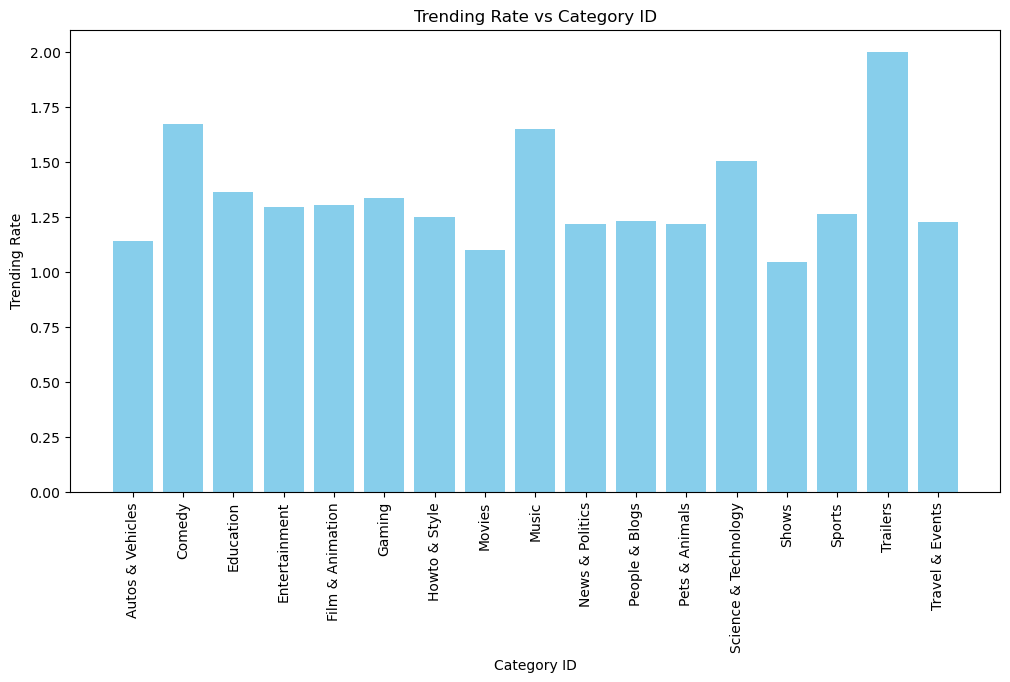

In [ ]:
# Aquí asumimos que cada fila en fr_videos es una entrada de un video en tendencia
tendencia_por_categoria = fr_videos['category_id'].value_counts()

# Calcular el número total de videos únicos por categoría
videos_por_categoria = fr_videos.drop_duplicates(subset=['video_id']).groupby('category_id').size()

# Calcular el trending_rate como la proporción de videos en tendencia sobre el total de videos por categoría
trending_rate = tendencia_por_categoria / videos_por_categoria

# Crear el DataFrame para el gráfico
df_trending_rate = pd.DataFrame({
    'category_id': trending_rate.index,
    'trending_rate': trending_rate.values
}).sort_values(by='category_id')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_trending_rate['category_id'], df_trending_rate['trending_rate'], color='skyblue')
plt.xlabel('Category ID')
plt.ylabel('Trending Rate')
plt.title('Trending Rate vs Category ID')
plt.xticks(df_trending_rate['category_id'])
plt.xticks(rotation=90)
 # Mostrar los números exactos de category_id en el eje x
plt.show()

In [ ]:
# Agrupar por categoría y calcular el total de likes y dislikes por categoría
category_likes = fr_videos.groupby('category_id')['likes'].sum()
category_dislikes = fr_videos.groupby('category_id')['dislikes'].sum()

# Calcular la proporción likes / dislikes por categoría
category_ratio = category_likes / category_dislikes

# Crear un DataFrame con los resultados
ratios_df = pd.DataFrame({
    'category': category_likes.index,
    'likes_dislikes_ratio': category_ratio
})

# Ordenar el DataFrame por la proporción likes / dislikes de forma descendente
ratios_df = ratios_df.sort_values(by='likes_dislikes_ratio', ascending=False)

# Mostrar el DataFrame con las proporciones
print(ratios_df)

                                  category  likes_dislikes_ratio
category_id                                                     
Travel & Events            Travel & Events             79.396539
Education                        Education             41.233041
Comedy                              Comedy             38.571022
Science & Technology  Science & Technology             36.169455
Autos & Vehicles          Autos & Vehicles             30.745637
Pets & Animals              Pets & Animals             29.948846
Music                                Music             28.377529
Howto & Style                Howto & Style             24.115922
Movies                              Movies             23.182252
Film & Animation          Film & Animation             22.540890
Trailers                          Trailers             21.333333
Gaming                              Gaming             20.504387
Sports                              Sports             20.487167
People & Blogs           

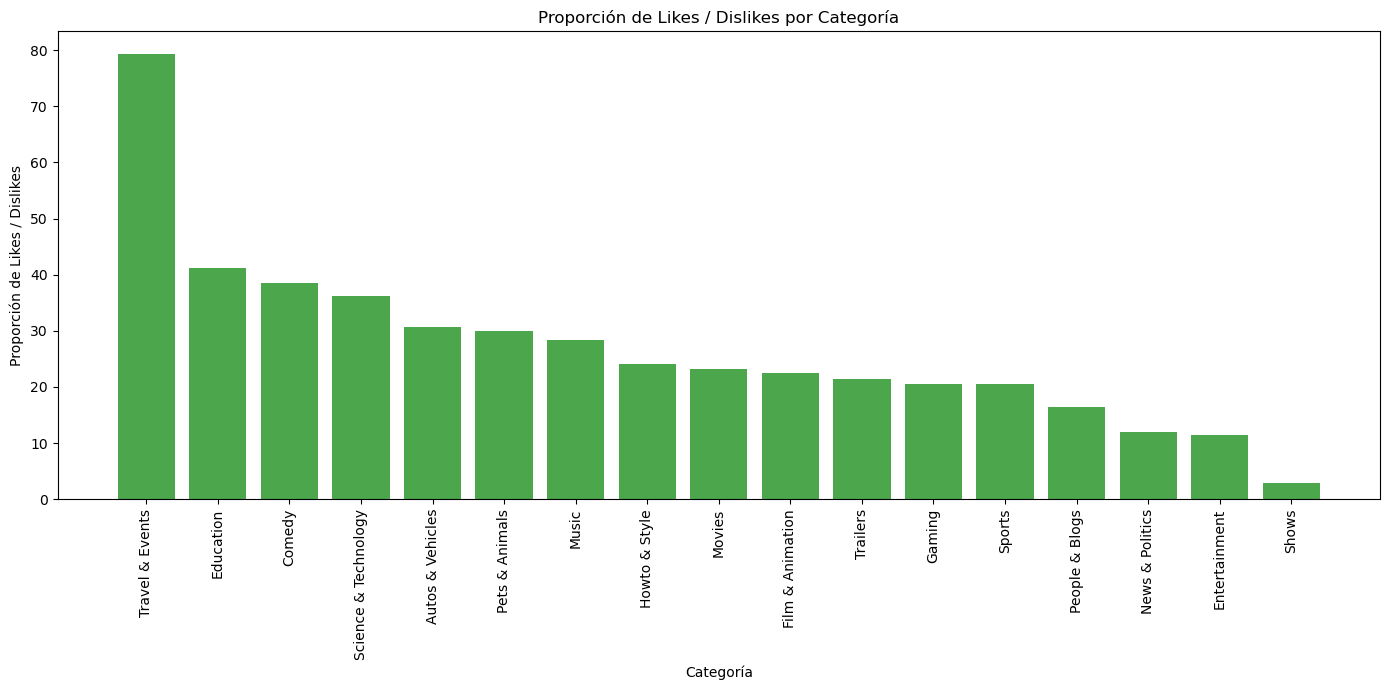

In [ ]:

# Graficar la proporción likes / dislikes por categoría
plt.figure(figsize=(14, 7))
plt.bar(ratios_df['category'], ratios_df['likes_dislikes_ratio'], color='green', alpha=0.7)
plt.xlabel('Categoría')
plt.ylabel('Proporción de Likes / Dislikes')
plt.title('Proporción de Likes / Dislikes por Categoría')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar los datos para excluir los registros donde comment_count es cero
fr_videos_filtered = fr_videos[fr_videos['comment_count'] != 0]

# Agrupar por categoría y calcular el total de vistas y comentarios por categoría
category_views = fr_videos_filtered.groupby('category_id')['views'].sum()
category_comments = fr_videos_filtered.groupby('category_id')['comment_count'].sum()

# Calcular la proporción views / comments por categoría
category_views_comments_ratio = category_views / category_comments

# Crear un DataFrame con los resultados
ratios_df = pd.DataFrame({
    'category': category_views.index,
    'views_comments_ratio': category_views_comments_ratio
})

# Ordenar el DataFrame por la proporción views / comments de forma descendente
ratios_df = ratios_df.sort_values(by='views_comments_ratio', ascending=False)

# Mostrar el DataFrame con las proporciones
print(ratios_df)

                                  category  views_comments_ratio
category_id                                                     
Shows                                Shows           1154.670046
Movies                              Movies            700.895706
Sports                              Sports            434.798003
Film & Animation          Film & Animation            315.310790
People & Blogs              People & Blogs            276.022240
Howto & Style                Howto & Style            266.015373
News & Politics            News & Politics            239.774031
Entertainment                Entertainment            236.040143
Pets & Animals              Pets & Animals            230.988709
Comedy                              Comedy            207.025184
Music                                Music            196.727558
Autos & Vehicles          Autos & Vehicles            173.379155
Education                        Education            155.189773
Science & Technology  Sci

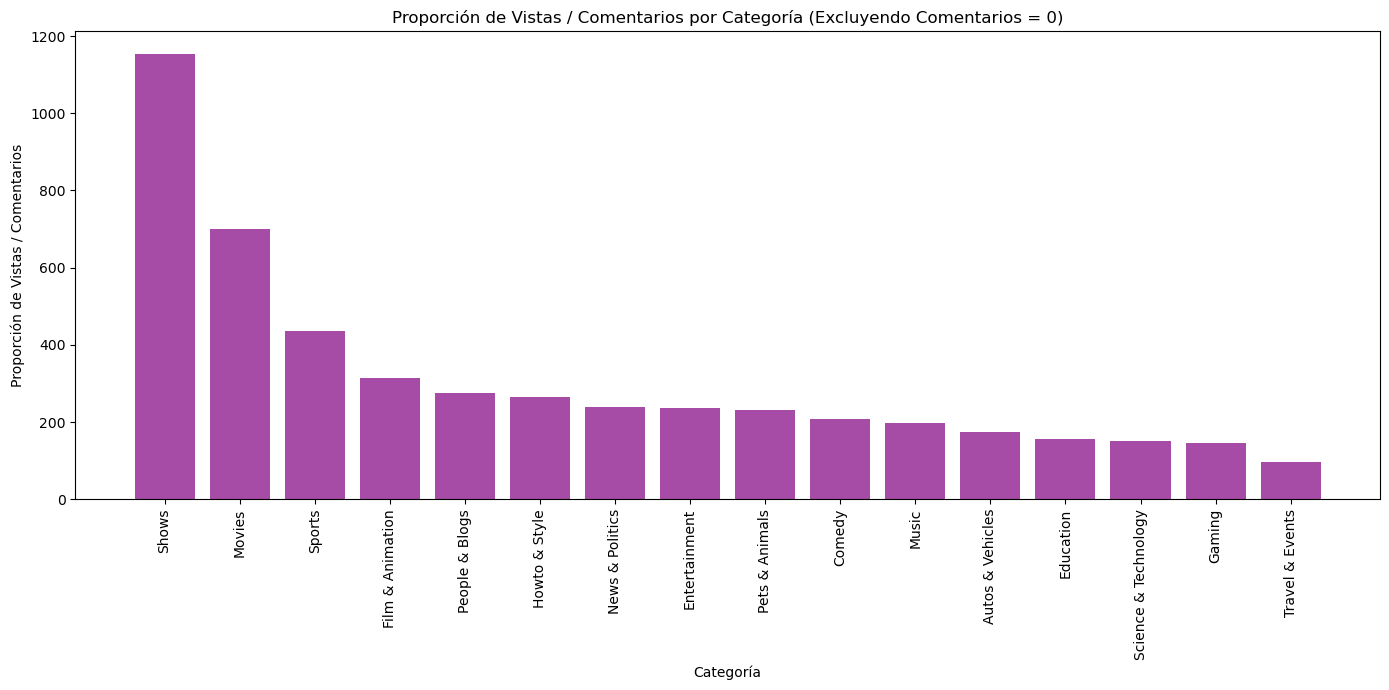

In [ ]:
# Graficar la proporción views / comments por categoría
plt.figure(figsize=(14, 7))
plt.bar(ratios_df['category'], ratios_df['views_comments_ratio'], color='purple', alpha=0.7)
plt.xlabel('Categoría')
plt.ylabel('Proporción de Vistas / Comentarios')
plt.title('Proporción de Vistas / Comentarios por Categoría (Excluyendo Comentarios = 0)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#pregunta 5
def pasar_trending_date(date_str):
  day, month, year = date_str.split('.')
  return pd.to_datetime(f"{year}-{month}-{day}", format="%Y-%m-%d")
fr_videos["publish_time"] = pd.to_datetime(fr_videos["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ")
fr_videos["trending_date"] =  fr_videos["trending_date"].apply(pasar_trending_date)


# Extraer mes y año de las columnas de fecha
fr_videos["publish_time_month"] = fr_videos["publish_time"].dt.month
fr_videos["publish_time_year"] = fr_videos["publish_time"].dt.year

# Agrupar por trending_date
df_grouped = fr_videos.groupby(["trending_date"])[
    "video_id", "trend_score"
].mean().reset_index()

# Visualizar el trend_score promedio por trending_date
plt.figure(figsize=(15, 6))
plt.plot(df_grouped["trending_date"], df_grouped["trend_score"])
plt.xlabel("Fecha de Tendencia")
plt.ylabel("Trend Score Promedio")
plt.title("Trend Score Promedio de Videos en Tendencia en YouTube Francia (2016-2024)")
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas de fecha para mayor legibilidad
plt.tight_layout()
plt.show()

Canales con mayor frecuencia de tendencia en YouTube Francia:
Lolywood
BIZBIZ
Cocovoit
France Inter
Les Grosses Têtes
NDEKO ELIEZER TOKOKOMA
Touche pas à mon poste !
Troom Troom FR
VikatanTV
Zap Télé

Canales con menor frecuencia de tendencia en YouTube Francia:
100% MOTOS
100% RIRES
100/ Potins GALSEN
103 mob stories
21 Savage
360 Ve
ALGERIE Football
ALL SPORTS
ALL THE K-POP
ALLAOUA OFFICIEL


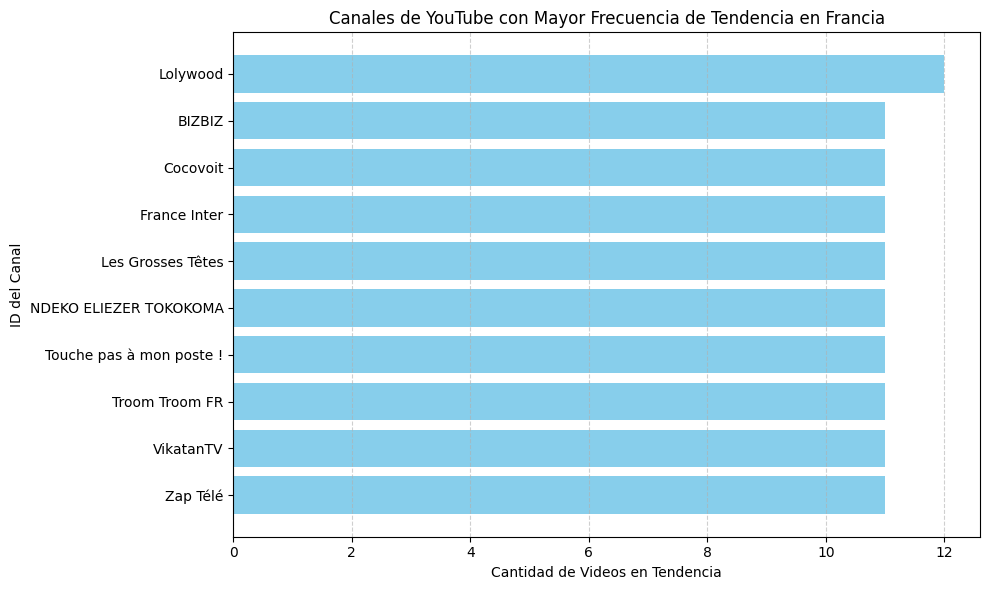

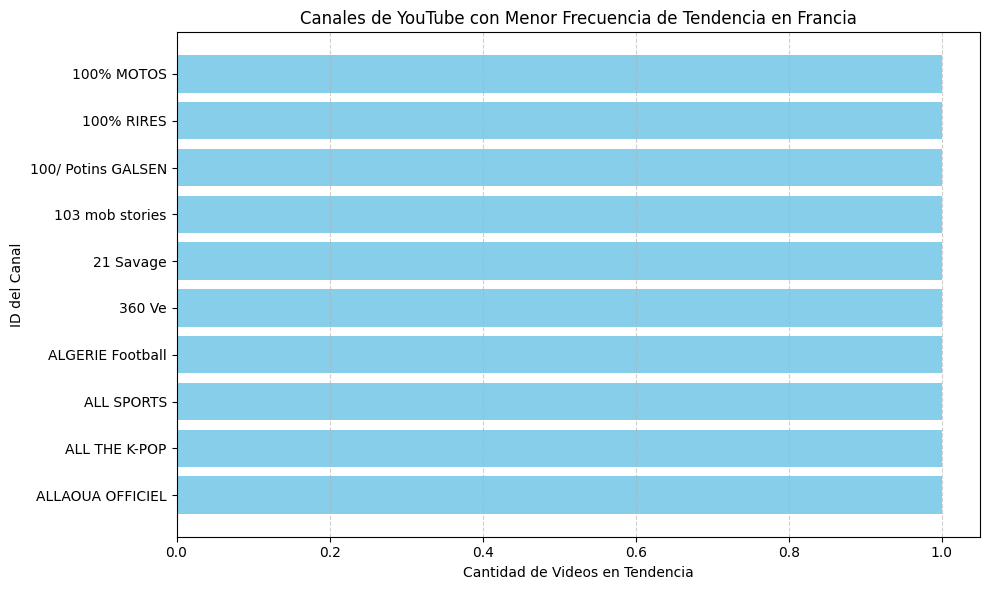

In [55]:
#pregunta 6
# Cálculo de la frecuencia de tendencia
channel_frequency = fr_videos.groupby("channel_title")["video_id"].count().reset_index()

# Canales con mayor frecuencia de tendencia
top_channels = channel_frequency.nlargest(10, "video_id")["channel_title"].tolist()
tc = channel_frequency.nlargest(10, "video_id")
# Canales con menor frecuencia de tendencia
least_frequent_channels = channel_frequency.nsmallest(10, "video_id")["channel_title"].tolist()
lf = channel_frequency.nsmallest(10, "video_id")
# Imprimir resultados
print("Canales con mayor frecuencia de tendencia en YouTube Francia:")
for channel_title in top_channels:
    print(channel_title)

print("\nCanales con menor frecuencia de tendencia en YouTube Francia:")
for channel_title in least_frequent_channels:
    print(channel_title)

plt.figure(figsize=(10, 6))
plt.barh(tc["channel_title"], tc["video_id"], color='skyblue')
plt.xlabel("Cantidad de Videos en Tendencia")
plt.ylabel("ID del Canal")
plt.title("Canales de YouTube con Mayor Frecuencia de Tendencia en Francia")
plt.gca().invert_yaxis()  # Invertir el eje Y para que los canales con mayor frecuencia estén arriba
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(lf["channel_title"], lf["video_id"], color='skyblue')
plt.xlabel("Cantidad de Videos en Tendencia")
plt.ylabel("ID del Canal")
plt.title("Canales de YouTube con Menor Frecuencia de Tendencia en Francia")
plt.gca().invert_yaxis()  # Invertir el eje Y para que los canales con mayor frecuencia estén arriba
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()